In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def import_data_from_file(filename):
    """
    Import financial data from a text file into a pandas DataFrame.
    
    Args:
        filename (str): Path to the text file containing the data
        
    Returns:
        pandas.DataFrame: DataFrame containing the imported data
    """
    # Read the data from the file, using whitespace as delimiter
    # Skip the header row (row 0) and use our own column names
    df = pd.read_csv(filename, 
                     engine='python',
                     sep=r'\t',  # Use tab as delimiter
                     #delim_whitespace=True, 
                     skiprows=1,
                     names=['date', 'ouv', 'haut', 'bas', 'clot', 'vol', 'devise'])

    # Convert date column to datetime format
    df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')
        
    # Convert numeric columns to appropriate types
    numeric_cols = ['ouv', 'haut', 'bas', 'clot', 'vol']
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)
    
    return df

def plot_prices(df, span='1J', bounds=False):
    """
    Plot the opening prices over time.
    
    Args:
        df (pandas.DataFrame): DataFrame containing the financial data
    """
    plt.figure(figsize=(12, 8))
    #plt.plot(df['date'], df['ouv'], linestyle='-', color='b', label='Opening Price')
    plt.plot(df['date'], df['clot'], linestyle='-', color='r', label='Closing Price')
    if bounds:
        plt.plot(df['date'], df['haut'], linestyle=':', color='g', label='High Price')
        plt.plot(df['date'], df['bas'], linestyle=':', color='y', label='Low Price')
    
    plt.title(f'Closing Prices Over Time {span}', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (VND)', fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Format x-axis to show dates nicely
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d/%m/%Y'))
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    plt.show()


Data imported successfully:

DataFrame info:


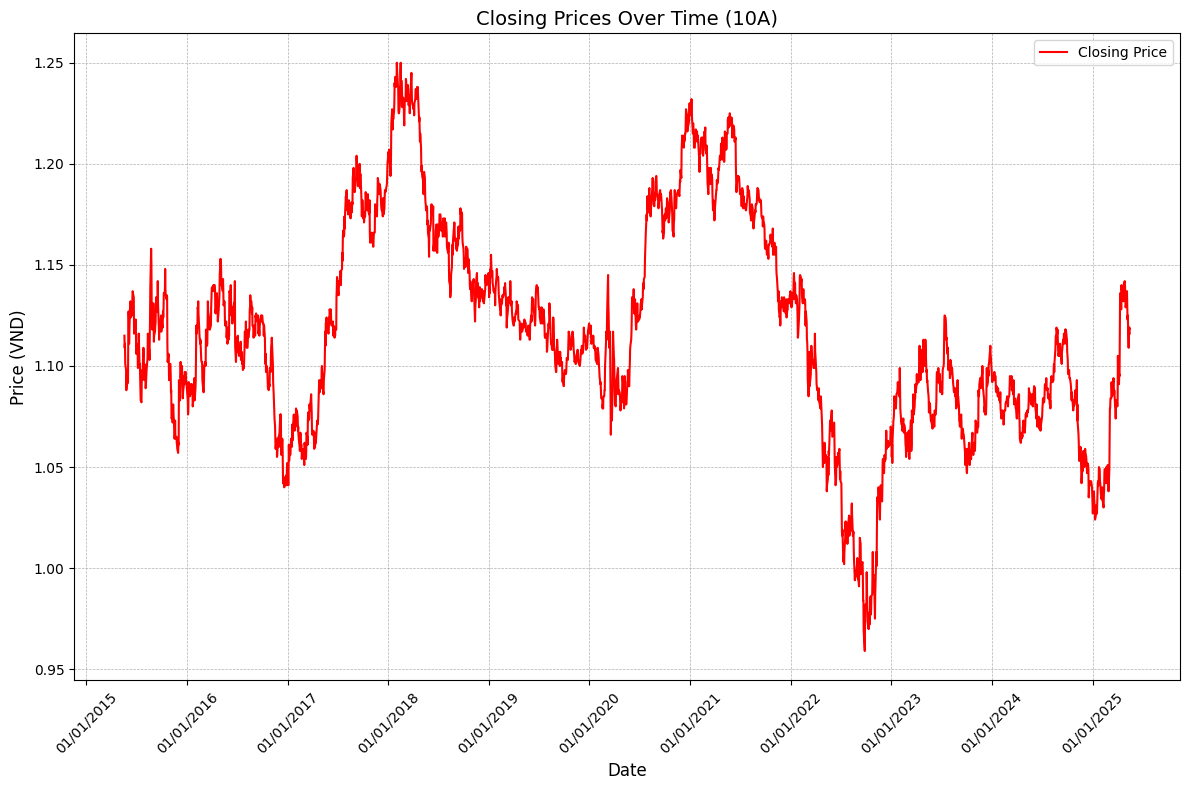

Plotting completed successfully.


In [8]:
# Change this to the desired span (1J, 5J, 1M, 3M, 6M, 1A, 5A, 10A)
span = '(10A)'  

# Example usage
if __name__ == "__main__":
    # Define the filename based on the span
    filename = fr'C:/Users/jeand/Downloads/EURUSDSPOT_2025-05-19.txt'
    
    try:
        data = import_data_from_file(filename)
        print("Data imported successfully:")
        #print(data.head())
        
        # Optional: Display DataFrame info
        print("\nDataFrame info:")
        #print(data.info())

        # Plot the opening prices
        plot_prices(data, span=span)
        print("Plotting completed successfully.")
        
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")
    

In [9]:
len(data)

2560

In [10]:
def plot_spans(ax, df, line_color='b', span='1J', bounds=False):

    #plt.plot(df['date'], df['ouv'], linestyle='-', color='b', label='Opening Price')
    ax.plot(df['date'], df['clot'], linestyle='-', color=line_color, label='Closing Price')
    ax.set_title(f'Closing prices {span}')
    # Subplot formatting
    ax.set_title(f'Time Span: {span}', pad=15)
    ax.set_ylabel('Price (USD)', fontsize=10)  # Individual y-label for each subplot
    ax.set_xlabel('Date', fontsize=10)  # Individual x-label for each subplot
    if bounds:
        ax.plot(df['date'], df['haut'], linestyle=':', color='g', label='High Price')
        ax.plot(df['date'], df['bas'], linestyle=':', color='y', label='Low Price')
    
    plt.title(f'Closing Prices Over Time {span}', fontsize=14)
    #plt.xlabel('Date', fontsize=12)
    #plt.ylabel('Price (VND)', fontsize=12)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    #plt.legend()
    
    # Rotate x-axis labels for better readability
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Format x-axis to show dates nicely
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d/%m/%Y'))
    

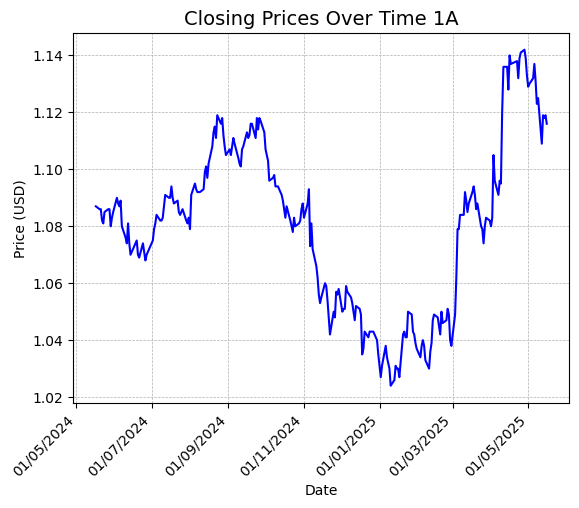

In [11]:
filename = fr'C:/Users/jeand/Downloads/EURUSDSPOT_2025-05-19.txt'
data = import_data_from_file(filename)
fig, ax = plt.subplots()
plot_spans(ax, data[-256:], line_color='b', span='1A', bounds=False)

In [16]:
from matplotlib.colors import LinearSegmentedColormap
# Function to plot individual spans
def plot_individual_spans():

    # List of spans to plot
    spans = ['1M', '3M', '6M', '1A', '5A', '10A']
    # one year = 256 days
    spans_ = [256//12, 256//4, 256//2, 256, 256*5, 2560]

    """Create a single figure with subplots for each time span."""
    # Determine grid layout (2 columns, enough rows)
    n_spans = len(spans)
    n_cols = 2
    n_rows = int(np.ceil(n_spans / n_cols))

    # Create custom color gradient
    colors = LinearSegmentedColormap.from_list('custom', ['#1f77b4', '#ff7f0e', '#2ca02c', 
                                                         '#d62728', '#9467bd', '#8c564b', 
                                                         '#e377c2', '#7f7f7f', '#bcbd22'])
    
    # Create figure with subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    fig.suptitle('EUR/USD Exchange Rate Across Different Time Spans', y=0.95, fontsize=14)

    # Adjust the spacing parameters
    plt.subplots_adjust(hspace=0.5, wspace=0.2)  # More vertical and horizontal space
    
    # Flatten axes array for easy iteration
    if n_spans > 1:
        axes = axes.flatten()
    else:
        axes = [axes]

    # Define the filename based on the span
    filename = fr'C:/Users/jeand/Downloads/EURUSDSPOT_2025-05-19.txt'
    
    try:
        data = import_data_from_file(filename)

    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

    for i, span in enumerate(spans_):
        ax = axes[i]
        # Get unique color for each subplot
        line_color = colors(i/n_spans)

        # Plot the opening prices
        #print(spans[i])
        plot_spans(ax, data[-span:], line_color, span=spans[i])
        #print("Plotting completed successfully.")
            
        
        
# Final tight layout adjustment
plt.tight_layout(pad=3.0, h_pad=2.0, w_pad=2.0)
plt.show()


<Figure size 640x480 with 0 Axes>

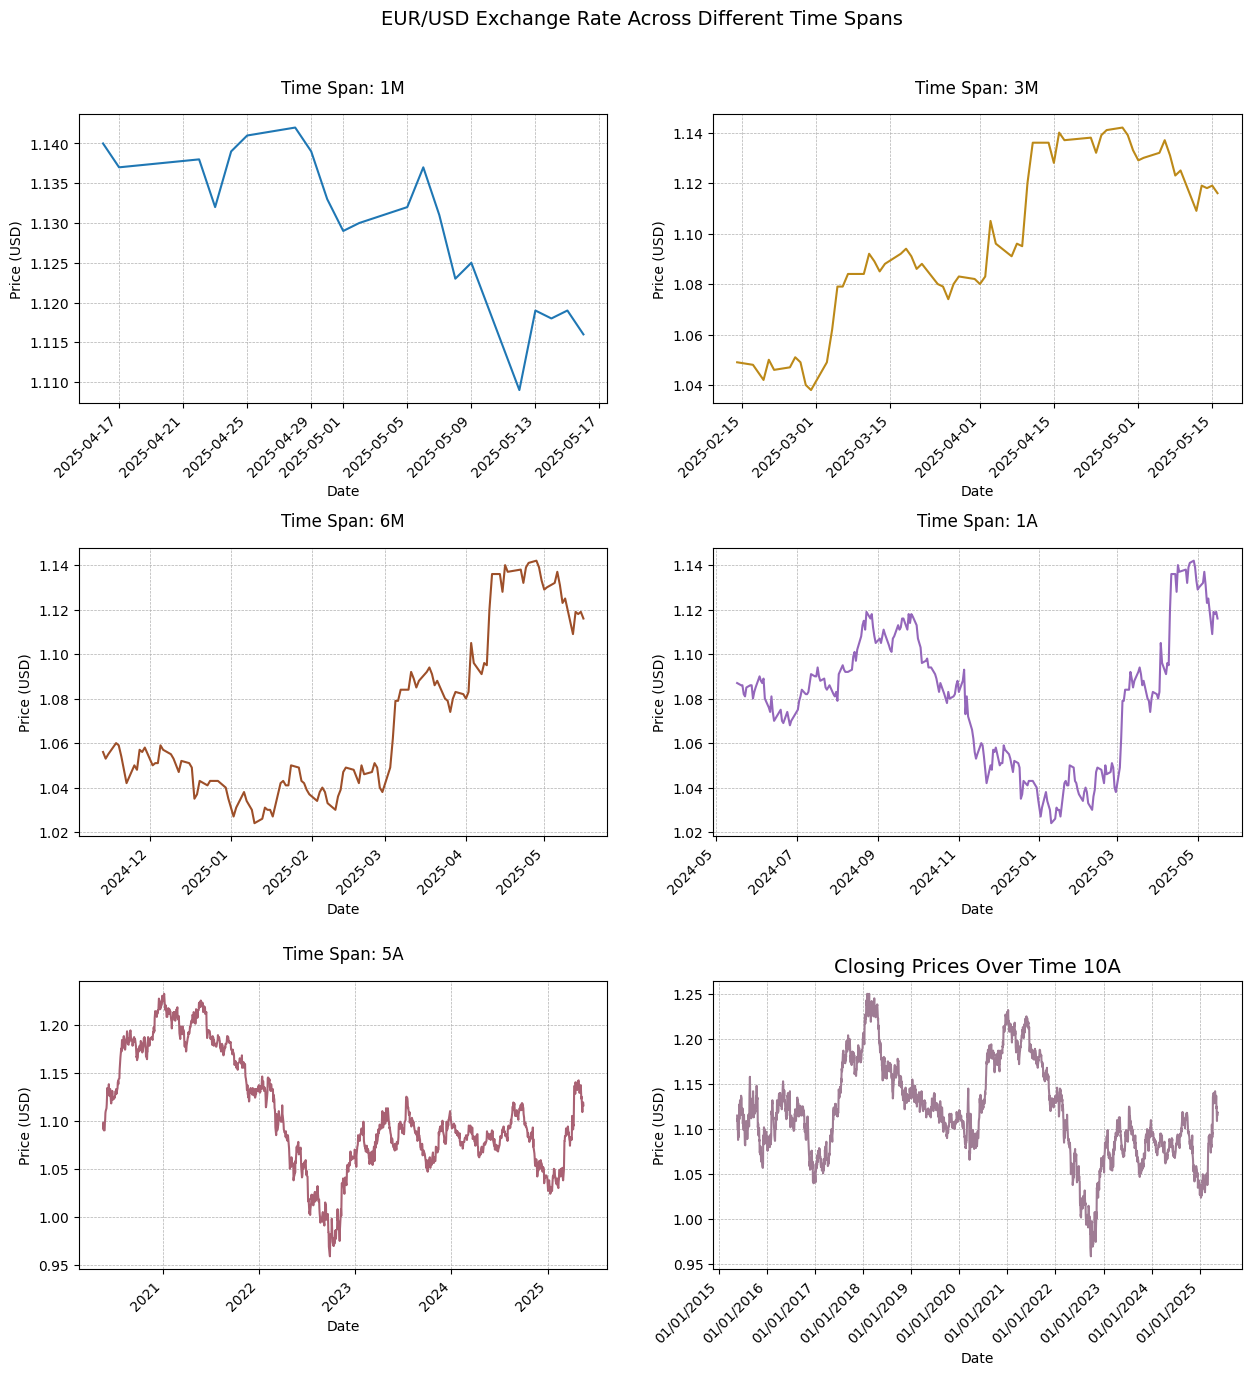

In [ ]:
# Example usage
if __name__ == "__main__":
    plot_individual_spans()